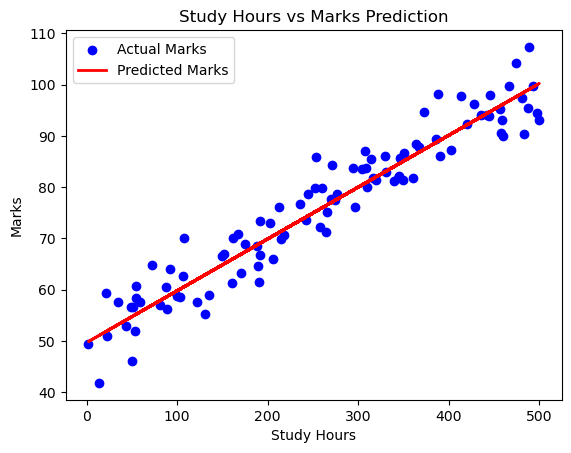

Predicted marks for 7 study hours: 50.41


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("study_hours_marks.csv")

# Split data into features and target
X = df["Study Hours"].values
y = df["Marks"].values

# Split into training and testing sets
def train_test_split_manual(X, y, test_size=0.2, random_state=42):
    np.random.seed(random_state)
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    split_idx = int(len(X) * (1 - test_size))
    X_train, X_test = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_test = y[indices[:split_idx]], y[indices[split_idx:]]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_manual(X, y)

# Compute slope (m) and intercept (b) using least squares method
mean_x, mean_y = np.mean(X_train), np.mean(y_train)
m = np.sum((X_train - mean_x) * (y_train - mean_y)) / np.sum((X_train - mean_x) ** 2)
b = mean_y - m * mean_x

def predict(X, m, b):
    return m * X + b

# Make predictions
y_pred = predict(X_test, m, b)

# Plot actual vs predicted marks
plt.scatter(X_test, y_test, color='blue', label='Actual Marks')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Marks')
plt.xlabel("Study Hours")
plt.ylabel("Marks")
plt.title("Study Hours vs Marks Prediction")
plt.legend()
plt.show()

# Function to predict marks based on study hours
def predict_marks(hours, m, b):
    return m * hours + b

# Example usage
study_hours = 7
print(f"Predicted marks for {study_hours} study hours: {predict_marks(study_hours, m, b):.2f}")
